## **Part 2 -- Predicting Solubility of Molecules using PyCaret**

Cheminformatics via the use of the low-code machine learning library PyCaret.

In [1]:
! pip install pycaret

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('https://github.com/punitjain-jp/project/raw/main/solubility_with_descriptors.csv')

In [4]:
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#### **Model Building**

In [36]:
from pycaret.regression import *

In [6]:
model = setup(data = dataset, target = 'logS', train_size=0.8, silent=True)

,Description,Value
0,session_id,3632
1,Target,logS
2,Original Data,"(1144, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 4)"


In [35]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5031,0.5132,0.7144,0.8774,0.2077,0.6142,0.560
rf,Random Forest Regressor,0.5271,0.5429,0.7337,0.8717,0.2085,0.6246,0.726
lightgbm,Light Gradient Boosting Machine,0.5558,0.5755,0.7571,0.8629,0.2186,0.7084,0.092
gbr,Gradient Boosting Regressor,0.5935,0.6214,0.7857,0.8528,0.2254,0.6664,0.146
ada,AdaBoost Regressor,0.6996,0.8112,0.8991,0.8063,0.2447,0.7831,0.137
dt,Decision Tree Regressor,0.6683,0.9002,0.9445,0.7881,0.2537,0.6751,0.027
br,Bayesian Ridge,0.7767,1.0340,1.0144,0.7526,0.2864,0.8518,0.022
ridge,Ridge Regression,0.7762,1.0341,1.0145,0.7525,0.2866,0.8503,0.027
lar,Least Angle Regression,0.7761,1.0342,1.0145,0.7525,0.2867,0.8500,0.026
lr,Linear Regression,0.7761,1.0342,1.0145,0.7525,0.2867,0.8500,0.020


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3632, verbose=0, warm_start=False)

In [37]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5197,0.5602,0.7485,0.8566,0.2383,0.4756
1,0.4925,0.5355,0.7318,0.8844,0.1995,0.2906
2,0.5876,0.6454,0.8034,0.8822,0.2561,0.5594
3,0.4663,0.4453,0.6673,0.9039,0.1870,0.3236
4,0.4579,0.3750,0.6124,0.9113,0.1756,0.6527
5,0.5005,0.4420,0.6648,0.8654,0.1864,0.3011
6,0.5001,0.5075,0.7124,0.8762,0.1961,0.4949
7,0.4675,0.4867,0.6977,0.8843,0.2131,0.2391
8,0.5236,0.5567,0.7461,0.8684,0.2379,2.4442
9,0.5148,0.5777,0.7601,0.8411,0.1872,0.3609


##### **Tuning**

In [38]:
tuned_et= tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6313,0.6685,0.8176,0.8288,0.2427,1.6763
1,0.6912,0.8972,0.9472,0.8064,0.2275,0.4375
2,0.7841,0.9832,0.9916,0.8206,0.2869,0.7835
3,0.6429,0.7236,0.8507,0.8439,0.2290,0.5113
4,0.7292,0.8565,0.9255,0.7974,0.2299,0.8072
5,0.7475,0.8149,0.9027,0.7519,0.2681,0.5854
6,0.6908,0.8035,0.8964,0.8039,0.2628,1.0353
7,0.6442,0.7383,0.8592,0.8245,0.2208,0.5720
8,0.6803,0.8744,0.9351,0.7933,0.2625,2.5131
9,0.7432,0.8537,0.9240,0.7652,0.2482,0.6262


#### **Model Analysis**

**Residuals Plot**

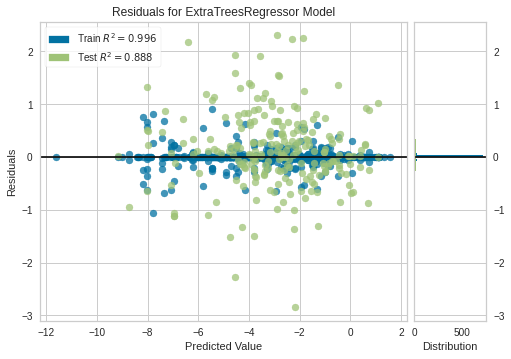

In [39]:
plot_model(et, plot='residuals')

**Prediction Error Plot**

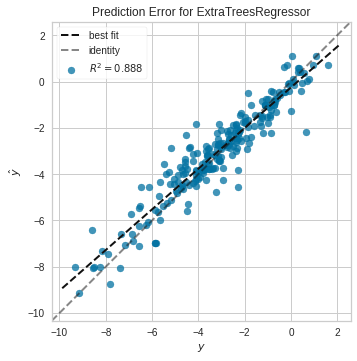

In [40]:
plot_model(et, 'error')

**Cooks Distance Plot**

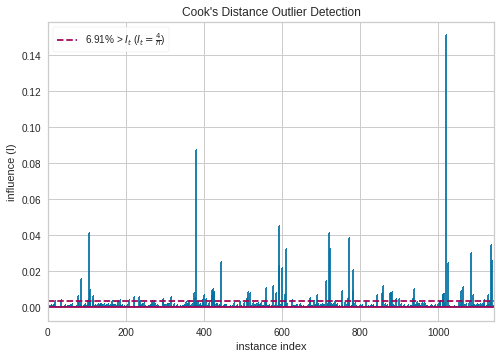

In [41]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

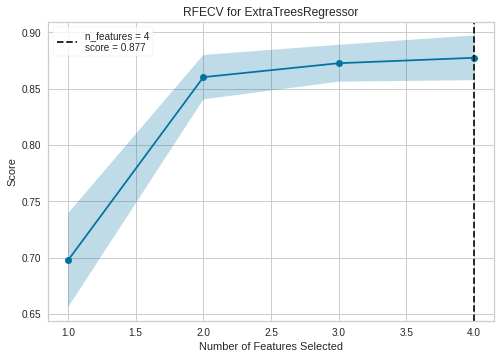

In [42]:
plot_model(et, 'rfe')

**Learning Curve**

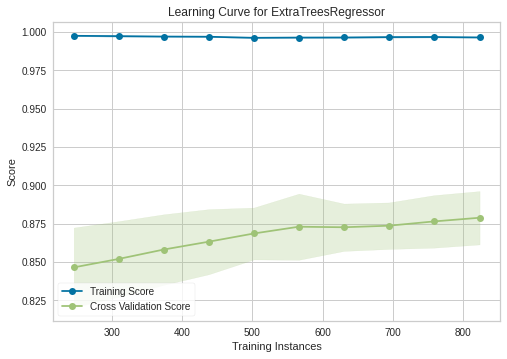

In [43]:
plot_model(et, 'learning')

**Validation Curve**

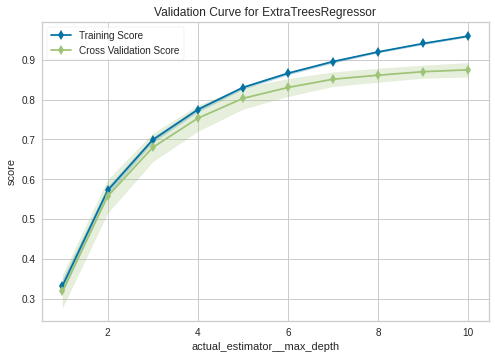

In [44]:
plot_model(et, 'vc')

**Manifold Learning**

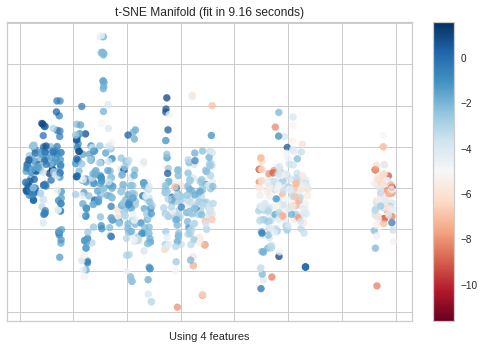

In [45]:
plot_model(et, 'manifold')

**Feature Importance**

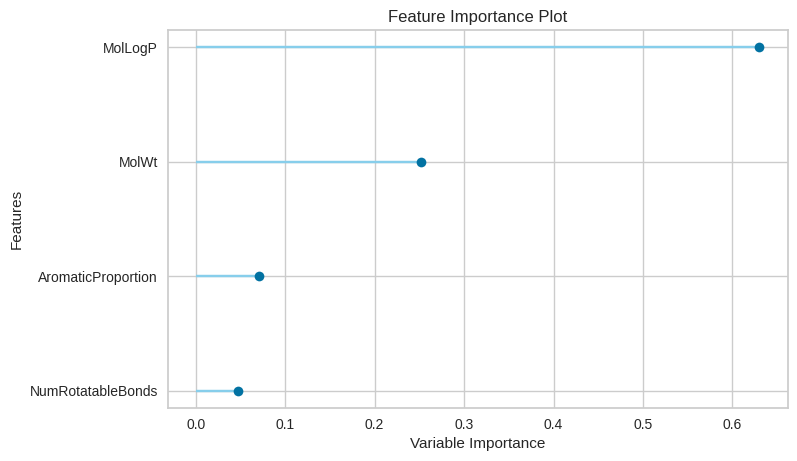

In [46]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [47]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


Here, the hyperparameter of the tuned model is displayed below.

In [48]:
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,5
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0001
min_impurity_split,None
min_samples_leaf,3


##### **Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.

SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

In [54]:
! pip install shap

     |████████████████████████████████| 564 kB 5.5 MB/s 


**Summary Plot**

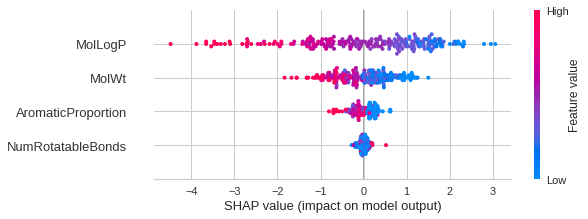

In [55]:
interpret_model(et)

**Correlation Plot**

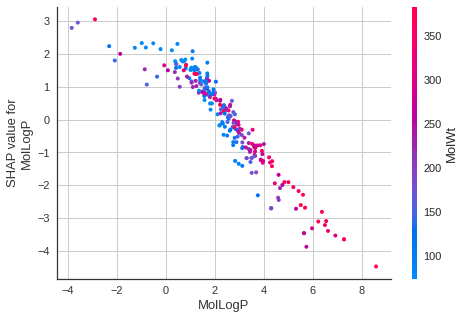

In [57]:
interpret_model(et, plot='correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [58]:
interpret_model(et, plot = 'reason', observation = 10)

#### **External Testing**

Apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [59]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5273,0.5379,0.7334,0.8885,0.1972,0.6544


In [60]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,0.4284,162.151993,1.0,0.833333,-1.110,-1.02450
1,5.3138,257.546997,1.0,0.800000,-6.250,-6.19400
2,6.3720,376.496002,9.0,0.642857,-8.600,-6.42611
3,4.3319,367.859985,7.0,0.285714,-4.432,-5.29304
4,-0.7716,151.128998,0.0,0.818182,-3.583,-3.18085
